# Foreground - Background Color Generation for MNIST

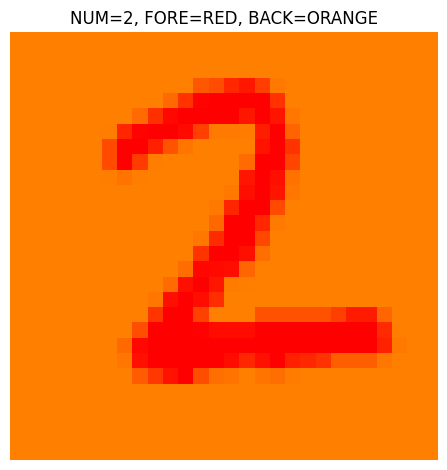

In [ ]:
import torch
from torchvision import datasets, transforms
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# MNIST 데이터셋을 로드합니다.
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# 무지개 색상 팔레트를 정의합니다 (7가지 색상).
RAINBOW_COLORS = [
    (255, 0, 0),    # 빨강
    (255, 127, 0),  # 주황
    (255, 255, 0),  # 노랑
    (0, 255, 0),    # 초록
    (0, 0, 255),    # 파랑
    (75, 0, 130),   # 남색 (인디고)
    (148, 0, 211)   # 보라
]

RAINBOW_NAMES = [
    'RED',
    'ORANGE',
    'YELLOW',
    'GREEN',
    'BLUE',
    'INDIGO',
    'VIOLET'
]

def get_random_rainbow_color():
    """무지개 팔레트에서 임의의 색상을 선택합니다."""
    # return tuple(np.random.randint(0, 256, size=3))
    idx = np.random.randint(0, len(RAINBOW_COLORS))
    return RAINBOW_COLORS[idx], RAINBOW_NAMES[idx]

def colorize_digit(digit_image, fg_color, bg_color):
    """숫자 이미지에 전경(fg)과 배경(bg) 색상을 적용합니다."""
    digit = digit_image.convert('L')  # 이미지를 그레이스케일로 변환합니다.
    colored_digit = ImageOps.colorize(digit, black=bg_color, white=fg_color).convert('RGBA')
    return colored_digit

def overlay_digit_on_background(colored_digit):
    """투명도를 제거하고 일관된 배경 이미지를 생성합니다."""
    final_image = colored_digit.convert('RGB')  # 투명도를 제거합니다.
    return final_image

# 전경과 배경 색상이 있는 MNIST 데이터셋을 생성하고 표시합니다.
idx = np.random.randint(0, len(mnist))  # 0~9 사이의 숫자
image, label = mnist[idx]
pil_image = transforms.ToPILImage()(image)

# 전경과 배경 색상을 무작위로 선택합니다.
fg_color, fg_label = get_random_rainbow_color()
bg_color, bg_label = get_random_rainbow_color()

# 전경과 배경 색상이 같지 않도록 보장합니다.
while bg_color == fg_color:
  bg_color, bg_label = get_random_rainbow_color()

# 선택된 색상으로 숫자 이미지를 색칠합니다.
colored_digit = colorize_digit(pil_image, fg_color, bg_color)

if image is not None:
  # 최종 이미지를 표시합니다.
  final_image = overlay_digit_on_background(colored_digit)
  plt.imshow(final_image)
  plt.axis('off')  # 축을 비활성화합니다.
  plt.title(f'NUM={label}, FORE={fg_label}, BACK={bg_label}')

  # 레이아웃을 조정하고 화면에 표시합니다.
  plt.tight_layout()
  plt.show()


# MNIST Generation using Custom Fonts

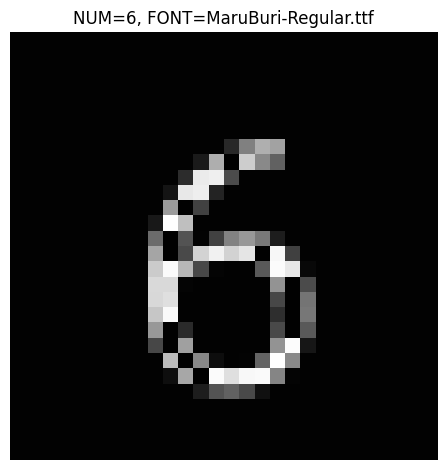

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from glob import glob

# 운영체제에 따라 한글 폰트를 설정합니다.
# if os.name == 'posix':
#     plt.rc("font", family="AppleGothic")  # macOS와 같은 POSIX 시스템용
# else:
#     plt.rc("font", family="Malgun Gothic")  # Windows 시스템용

# plt.rc("axes", unicode_minus=False)  # 유니코드 마이너스 기호 사용 설정

# 폰트 경로를 재귀적으로 탐색하여 모든 ttf 폰트 파일을 가져옵니다.
FONT_PATHS = glob('./fonts/**/*.ttf', recursive=True)

# MNIST와 유사한 이미지 크기와 폰트 크기 설정
IMAGE_SIZE = (28, 28)  # 이미지 크기 (28x28)
FONT_SIZE = 22  # 폰트 크기

def generate_digit_image(digit, font_path):
    """ 주어진 폰트로 특정 숫자 이미지를 생성하는 함수 """
    # 흰 배경의 이미지를 생성합니다.
    image = Image.new("L", IMAGE_SIZE, 255)  # 흰 배경 이미지 (L 모드는 그레이스케일)
    draw = ImageDraw.Draw(image)  # 이미지를 그리기 위한 객체 생성

    try:
        # 지정된 경로에서 폰트를 불러옵니다.
        font = ImageFont.truetype(font_path, FONT_SIZE)
    except IOError:
        # 폰트를 불러올 수 없는 경우 오류 메시지 출력
        print(f"폰트를 불러올 수 없습니다: {font_path}")
        return None

    # 텍스트(숫자)의 경계 상자를 계산합니다.
    bbox = draw.textbbox((0, 0), str(digit), font=font)
    text_width, text_height = bbox[2] - bbox[0], bbox[3] - bbox[1]

    # 텍스트를 이미지의 중앙에 배치합니다.
    # position = ((IMAGE_SIZE[0] - text_width) // 2, (IMAGE_SIZE[1] - text_height) // 2)
    position = ((IMAGE_SIZE[0] - text_width) // 2, 0)  # 위쪽에 정렬

    # 검은색(값 0)으로 숫자를 이미지에 그립니다.
    draw.text(position, str(digit), fill=0, font=font)

    return np.array(image)  # 생성된 이미지를 넘파이 배열로 반환

# 0에서 9 사이의 랜덤 숫자를 생성합니다.
digit = np.random.randint(0, 10)

# 폰트 경로 리스트에서 랜덤하게 하나의 폰트를 선택합니다.
font_path = random.choice(FONT_PATHS)

# 선택된 폰트로 숫자 이미지를 생성합니다.
image = generate_digit_image(digit, font_path)

if image is not None:
    # 이미지 파일로 저장하는 부분 (주석 처리됨)
    # image_filename = os.path.join(output_dir, f"{digit}_{i}.png")
    # Image.fromarray(image).save(image_filename)

    # 생성된 이미지를 화면에 표시합니다.
    plt.imshow(1 - image, cmap='gray')  # 이미지를 반전하여 검정색으로 보이게 설정
    plt.axis('off')  # 축 비활성화
    plt.title(f"NUM={digit}, FONT={font_path.split('/')[-1]}")  # 제목에 숫자와 폰트명 표시

    # 레이아웃을 조정하고 이미지를 표시합니다.
    plt.tight_layout()
    plt.show()


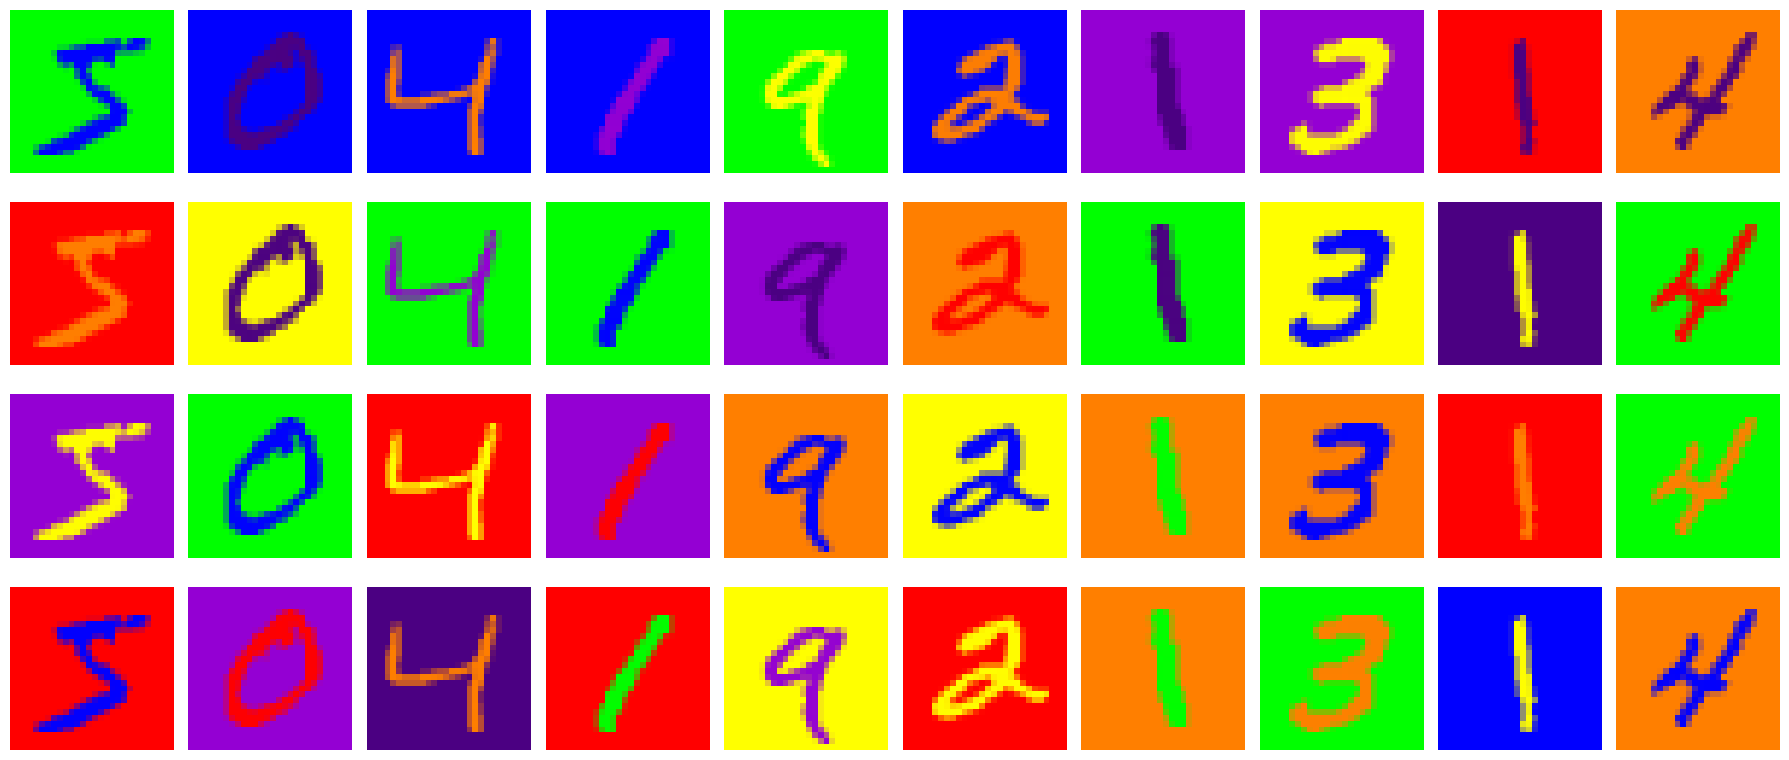

In [ ]:
import torch
from torchvision import datasets, transforms
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터셋을 로드합니다.
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# 무지개 색상 팔레트를 정의합니다 (7가지 색상).
RAINBOW_COLORS = [
    (255, 0, 0),    # 빨강
    (255, 127, 0),  # 주황
    (255, 255, 0),  # 노랑
    (0, 255, 0),    # 초록
    (0, 0, 255),    # 파랑
    (75, 0, 130),   # 남색 (인디고)
    (148, 0, 211)   # 보라
]

def get_random_rainbow_color():
    """무지개 팔레트에서 임의의 색상을 선택합니다."""
    return RAINBOW_COLORS[np.random.randint(0, len(RAINBOW_COLORS))]

def colorize_digit(digit_image, fg_color, bg_color):
    """숫자 이미지에 전경(fg)과 배경(bg) 색상을 적용합니다."""
    digit = digit_image.convert('L')  # 이미지를 그레이스케일로 변환합니다.
    colored_digit = ImageOps.colorize(digit, black=bg_color, white=fg_color).convert('RGBA')
    return colored_digit

def overlay_digit_on_background(colored_digit):
    """투명도를 제거하고 일관된 배경 이미지를 생성합니다."""
    final_image = colored_digit.convert('RGB')  # 투명도를 제거합니다.
    return final_image

# 전경과 배경 색상이 있는 MNIST 데이터셋을 생성하고 표시합니다.
fig, axes = plt.subplots(4, 10, figsize=(18, 8))  # 4개의 도메인(행)을 생성합니다.

for row in range(4):  # 4개의 도메인(행)에 대해 반복합니다.
    for col in range(10):  # 0부터 9까지의 숫자를 표시합니다.
        image, label = mnist[col]
        pil_image = transforms.ToPILImage()(image)

        # 전경과 배경 색상을 무작위로 선택합니다.
        fg_color = get_random_rainbow_color()
        bg_color = get_random_rainbow_color()

        # 전경과 배경 색상이 같지 않도록 보장합니다.
        while bg_color == fg_color:
            bg_color = get_random_rainbow_color()

        # 선택된 색상으로 숫자 이미지를 색칠합니다.
        colored_digit = colorize_digit(pil_image, fg_color, bg_color)

        # 최종 이미지를 표시합니다.
        final_image = overlay_digit_on_background(colored_digit)
        axes[row, col].imshow(final_image)
        # axes[row, col].imshow(image[0], cmap='gray')
        axes[row, col].axis('off')  # 축을 비활성화합니다.

# 레이아웃을 조정하고 화면에 표시합니다.
plt.tight_layout()
plt.show()


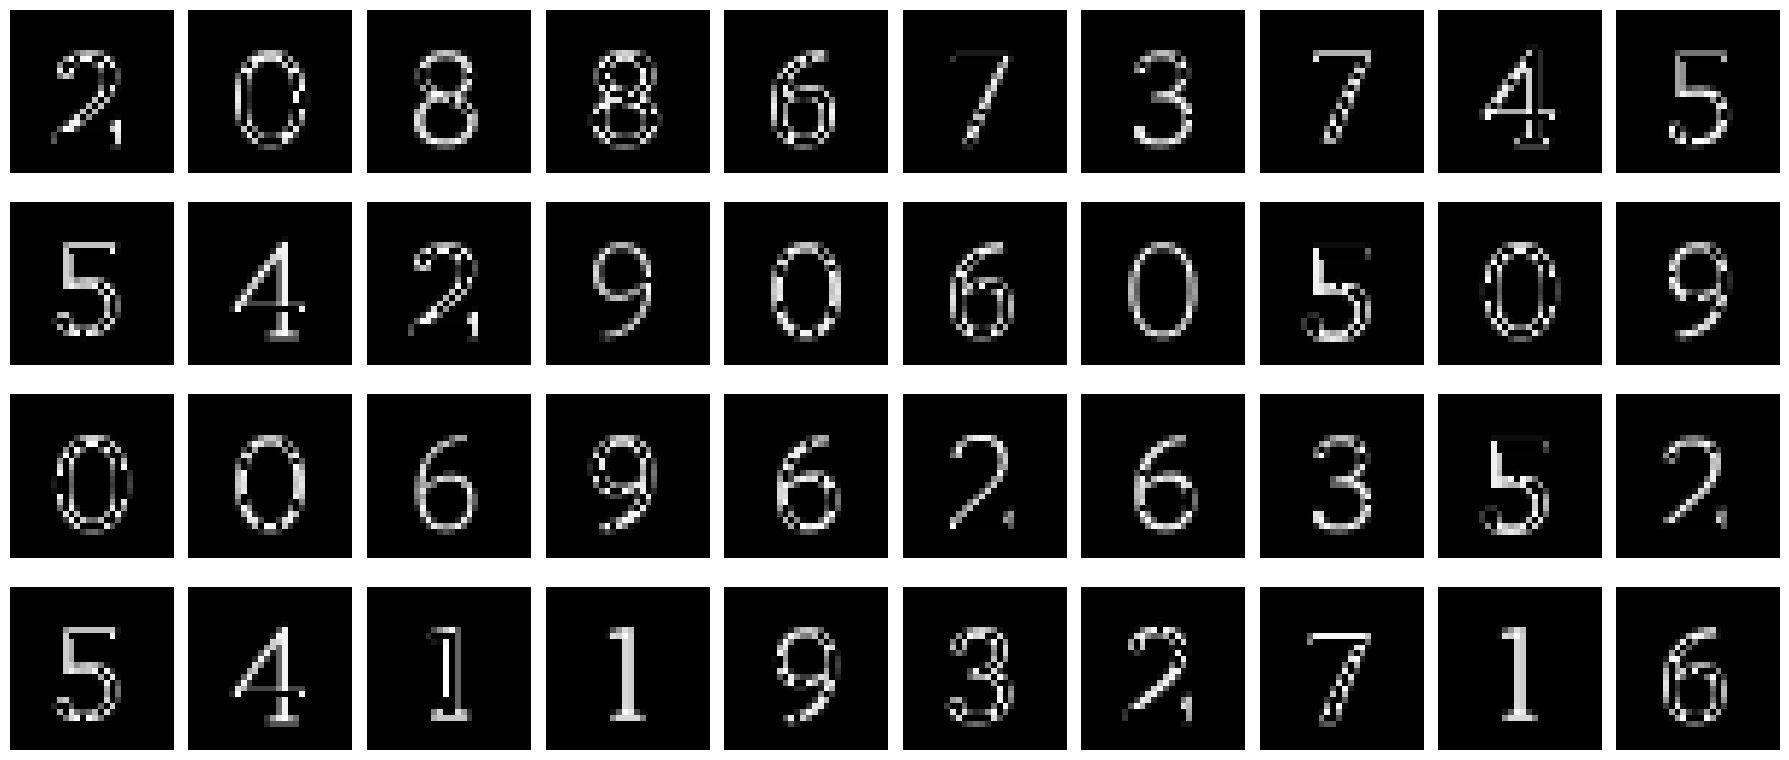

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from glob import glob

# 운영체제에 따라 한글 폰트를 설정합니다.
# if os.name == 'posix':
#     plt.rc("font", family="AppleGothic")  # macOS와 같은 POSIX 시스템용
# else:
#     plt.rc("font", family="Malgun Gothic")  # Windows 시스템용

# plt.rc("axes", unicode_minus=False)  # 유니코드 마이너스 기호 사용 설정

# 폰트 경로를 재귀적으로 탐색하여 모든 ttf 폰트 파일을 가져옵니다.
FONT_PATHS = glob('./fonts/**/*.ttf', recursive=True)

# MNIST와 유사한 이미지 크기와 폰트 크기 설정
IMAGE_SIZE = (28, 28)  # 이미지 크기 (28x28)
FONT_SIZE = 22  # 폰트 크기

def generate_digit_image(digit, font_path):
    """ 주어진 폰트로 특정 숫자 이미지를 생성하는 함수 """
    # 흰 배경의 이미지를 생성합니다.
    image = Image.new("L", IMAGE_SIZE, 255)  # 흰 배경 이미지 (L 모드는 그레이스케일)
    draw = ImageDraw.Draw(image)  # 이미지를 그리기 위한 객체 생성

    try:
        # 지정된 경로에서 폰트를 불러옵니다.
        font = ImageFont.truetype(font_path, FONT_SIZE)
    except IOError:
        # 폰트를 불러올 수 없는 경우 오류 메시지 출력
        print(f"폰트를 불러올 수 없습니다: {font_path}")
        return None

    # 텍스트(숫자)의 경계 상자를 계산합니다.
    bbox = draw.textbbox((0, 0), str(digit), font=font)
    text_width, text_height = bbox[2] - bbox[0], bbox[3] - bbox[1]

    # 텍스트를 이미지의 중앙에 배치합니다.
    # position = ((IMAGE_SIZE[0] - text_width) // 2, (IMAGE_SIZE[1] - text_height) // 2)
    position = ((IMAGE_SIZE[0] - text_width) // 2, 0)  # 위쪽에 정렬

    # 검은색(값 0)으로 숫자를 이미지에 그립니다.
    draw.text(position, str(digit), fill=0, font=font)

    return np.array(image)  # 생성된 이미지를 넘파이 배열로 반환



# 전경과 배경 색상이 있는 MNIST 데이터셋을 생성하고 표시합니다.
fig, axes = plt.subplots(4, 10, figsize=(18, 8))  # 4개의 도메인(행)을 생성합니다.

for row in range(4):  # 4개의 도메인(행)에 대해 반복합니다.
    for col in range(10):  # 0부터 9까지의 숫자를 표시합니다.

        # 0에서 9 사이의 랜덤 숫자를 생성합니다.
        digit = np.random.randint(0, 10)

        # 폰트 경로 리스트에서 랜덤하게 하나의 폰트를 선택합니다.
        font_path = random.choice(FONT_PATHS)

        # 선택된 폰트로 숫자 이미지를 생성합니다.
        image = generate_digit_image(digit, font_path)

        axes[row, col].imshow(1 - image, cmap='gray')
        axes[row, col].axis('off')  # 축을 비활성화합니다.

# 레이아웃을 조정하고 화면에 표시합니다.
plt.tight_layout()
plt.show()



# # 0에서 9 사이의 랜덤 숫자를 생성합니다.
# digit = np.random.randint(0, 10)

# # 폰트 경로 리스트에서 랜덤하게 하나의 폰트를 선택합니다.
# font_path = random.choice(FONT_PATHS)

# # 선택된 폰트로 숫자 이미지를 생성합니다.
# image = generate_digit_image(digit, font_path)

# if image is not None:
#     # 이미지 파일로 저장하는 부분 (주석 처리됨)
#     # image_filename = os.path.join(output_dir, f"{digit}_{i}.png")
#     # Image.fromarray(image).save(image_filename)

#     # 생성된 이미지를 화면에 표시합니다.
#     plt.imshow(1 - image, cmap='gray')  # 이미지를 반전하여 검정색으로 보이게 설정
#     plt.axis('off')  # 축 비활성화
#     plt.title(f"NUM={digit}, FONT={font_path.split('/')[-1]}")  # 제목에 숫자와 폰트명 표시

#     # 레이아웃을 조정하고 이미지를 표시합니다.
#     plt.tight_layout()
#     plt.show()
